# **Gradient Boosting**

Gradient Boosting is an ensemble learning technique that builds models in a stage-wise fashion. It creates a strong predictive model by combining the predictions of several weaker models (often decision trees). Unlike AdaBoost, which focuses on misclassified instances, Gradient Boosting minimizes a loss function using the gradient descent optimization algorithm, hence the name "Gradient Boosting."

### When to Use Gradient Boosting?

Gradient Boosting is particularly useful when:

- You have structured or tabular data.

- You want to achieve high accuracy and predictive performance.

- Your data contains complex patterns that simpler models struggle to capture.

- You are interested in both regression and classification tasks.

Gradient Boosting can handle a variety of loss functions and is often employed in Kaggle competitions due to its robustness.

### How Does Gradient Boosting Work?

Gradient Boosting works by sequentially adding weak learners (typically shallow decision trees) to the ensemble, each one correcting the errors made by the previous learners. Here’s a step-by-step breakdown:

**1. Initialize the Model:**

- Start with a base prediction (often the mean of the target values for regression tasks).

**2. Calculate Residuals:**

- Calculate the residuals (the difference between actual values and predicted values) of the current model.

**3. Fit a Weak Learner:**

- Train a new weak learner (e.g., decision tree) on the residuals to predict these errors. The idea is to learn the error of the previous model.

**4. Update the Model:**

- Update the model by adding the predictions of the new weak learner to the current model predictions, scaled by a learning rate (denoted as η).

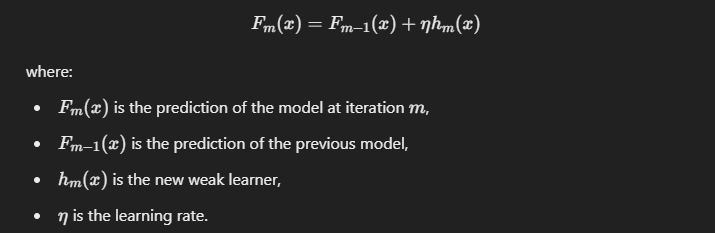

**5. Repeat:**

- Repeat steps 2 to 4 for a specified number of iterations or until a stopping criterion is met.

**6. Final Prediction:**

- The final prediction is a weighted sum of the weak learners’ predictions.

### Who Should Use Gradient Boosting?

- **Data scientists and machine learning practitioners**: Who want to build predictive models that leverage the power of ensemble learning.

- **Kaggle competitors**: Gradient Boosting is popular in data science competitions for its high predictive accuracy and flexibility.

- **Industries that require predictive analytics**: Applicable in finance, marketing, healthcare, and other fields that deal with regression or classification problems.

Advantages of Gradient Boosting:

- **High predictive performance**: Often achieves state-of-the-art results on various tasks.

- **Flexibility: Can optimize various loss functions and handle different types of data (e.g., continuous, categorical).
Robustness to overfitting**: When used with techniques like early stopping or regularization (e.g., limiting tree depth).

- **Feature importance**: Provides insight into the importance of features in making predictions.


Disadvantages of Gradient Boosting:

- **Sensitive to noise and outliers**: Can overfit if not properly regularized.

- **Longer training times**: Sequential training can be slower compared to parallelized models like Random Forest.

- **Complexity**: Requires careful tuning of hyperparameters (e.g., number of trees, learning rate, tree depth) for optimal performance.

### Real-World Applications of Gradient Boosting:

- **Finance**: Credit scoring and risk assessment, where high accuracy is crucial.

- **Customer segmentation**: In marketing analytics, to understand customer behavior.

- **Healthcare**: Predictive models for patient outcomes and disease risk.

- **Recommendation systems**: To personalize user experiences based on historical data.

In [19]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


wine = datasets.load_wine(as_frame=True)
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [20]:
X = wine['data']
y = wine['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.9221335697399526

In [23]:
param_grid = {
    'n_estimators': [10,50,100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_depth': [3,5,7,9]
}

gbr2 = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1)
gbr2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 500]})

In [24]:
gbr2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [25]:
gbr2.best_score_

0.9434101654846335